# Plotting with Matplotlib

Credits to Ben Root and the [Anatomy of Matplotlib](https://github.com/matplotlib/AnatomyOfMatplotlib) tutorial on which parts of this document are based.

## Introduction
Matplotlib (mpl) is a library for producing publication-quality figures<br>
while enabling interactive, cross-platform control over how we plot our data and with what appearance.

## Online Documentation
The [matplotlib.org](http://matplotlib.org) project website is the primary online resource for the library's documentation. It contains [examples](http://matplotlib.org/examples/index.html), [FAQs](http://matplotlib.org/faq/index.html), [API documentation](http://matplotlib.org/api/index.html), and, most importantly, the [gallery](http://matplotlib.org/gallery.html).

### Gallery
Many users of Matplotlib are often faced with the question, "I want to make a figure that has X with Y in the same figure, but it needs to look like Z". Good luck getting an answer from a web search with that query! This is why the [gallery](http://matplotlib.org/gallery.html) is so useful, because it showcases the variety of ways one can make figures. Browse through the gallery, click on any figure that has pieces of what you want to see and the code that generated it. Soon enough, you will be like a chef, mixing and matching components to produce your masterpiece!

In [1]:
from IPython.display import IFrame

IFrame(
    "https://matplotlib.org/stable/gallery/index",
    width="100%",
    height=400,
)

<br>

## Getting Started

In [2]:
from matplotlib import pyplot as plt

#### creating a figure

In [3]:
fig = plt.figure()
fig

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

But nothing is happening ... <br>
Thats because notebooks will not show empty figures.<br> 
If we were to run a normal python script instead, we would have to call
```python
plt.show()
```
which would then show as an empty figure
<center>
    <img src="images/empty_figure.png" alt="centered image" width="50%"/>
</center>

*So let's add some things to our figure!*

## Axes / Subplots

All plotting is done with respect to an [`Axes`](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes). An *Axes* is made up of [`Axis`](http://matplotlib.org/api/axis_api.html#matplotlib.axis.Axis) objects and many other things. An *Axes* object must belong to a *Figure* (and only one *Figure*). Most commands you will ever issue will be with respect to this *Axes* object.

To sep up a `Figure` together with `Axes` we have to options.
<br>
<br>

#### Option 1:
creating a figure with `plt.figure()`<br>
adding a subplot/axes to the figure with `fig.add_suplot(111)`


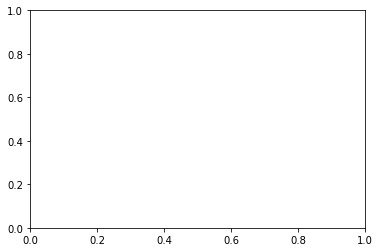

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)

The `111` indicates that in a `1` by `1` grid of subplots we place the subplot in the `1`st slot.

So for `24X` we could do the following

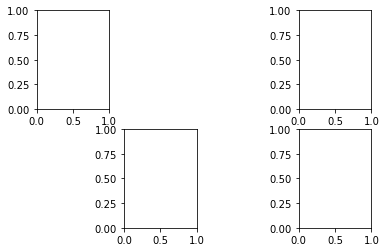

In [5]:
fig = plt.figure()
_ = fig.add_subplot(241)
_ = fig.add_subplot(244)
_ = fig.add_subplot(246)
_ = fig.add_subplot(248)

#### Option 2 (better imo)
It can be argued that the syntax of option 1 is not that covenient especially for when we want to have multiple subplots,<br> 
since we have to add each of them one by one.<br>

So instead we can use:

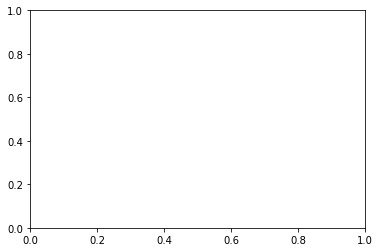

In [6]:
fig, axes = plt.subplots(nrows = 1, ncols = 1)

`plt.subplots` returns us both a figure and an array of axes/subplots.

If we want to created multiple subplots:

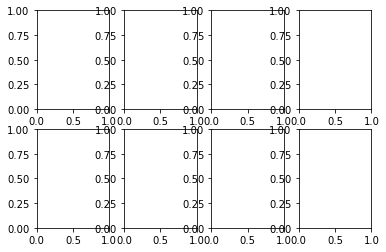

In [7]:
fig, axes = plt.subplots(nrows = 2, ncols = 4)

#### improving appearance with `fig.tight_layout()` and `figsize`
Right now the figure is very small and also the axis tick labels are overlapping. <br>
To fix that we can call `fig.tight_layout()`

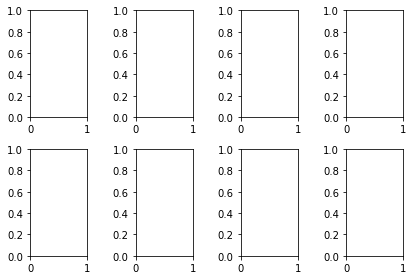

In [8]:
fig, axes = plt.subplots(nrows = 2, ncols = 4)
fig.tight_layout()

And also change change the figure size with the parameter `figsize`

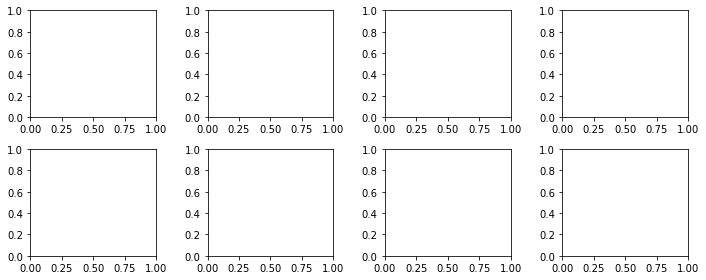

In [9]:
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize=(10, 4))
fig.tight_layout()

<br>

### `set`ting up our subplot

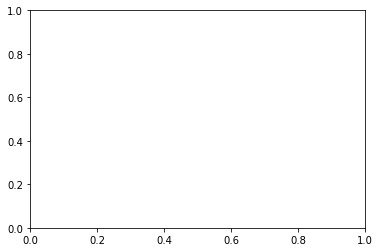

In [10]:
fig, ax = plt.subplots(nrows = 1, ncols = 1)

Matplotlib's objects typically have lots of "explicit setters" -- in other words, functions that start with ``set_<something>`` and control a particular option. 

To demonstrate this (and as an example of IPython's tab-completion), try typing `ax.set_` in a code cell, then hit the `<Tab>` key.  You'll see a long list of `Axes` methods that start with `set`.

So lets `set`up some things

In [11]:
ax.set_xlim([0.5, 4.5])
ax.set_ylim([-2, 8])
ax.set_title("An Example Axes")
ax.set_ylabel("Y-Axis")
ax.set_xlabel("X-Axis")

Text(0.5, 3.1999999999999993, 'X-Axis')

In notebooks we can show our figure just by writting its variable

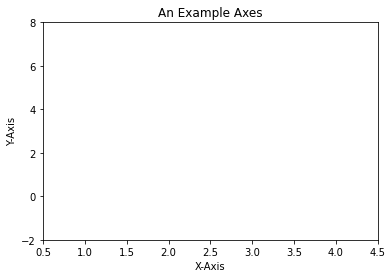

In [12]:
fig

### the same thing but shorter
Calling `set_<something>` can become very repetitive, so instead we can just call `set` and pass the different setters as kwargs.<br>
For example, `ax.set(foo='bar')` would call `ax.set_foo('bar')`.

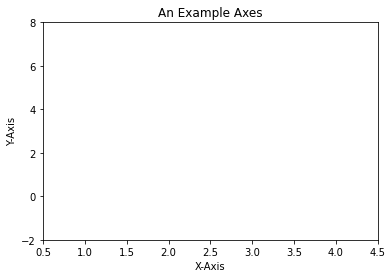

In [13]:
fig, ax = plt.subplots(nrows = 1, ncols = 1)

# the _ captures return values that we dont want to have displayed by jupyter
_ = ax.set(
    xlim=[0.5, 4.5], 
    ylim=[-2, 8], 
    title='An Example Axes',
    ylabel='Y-Axis', 
    xlabel='X-Axis',
)

<br>

## Basic Plotting

Most plotting happens on an `Axes`.  Therefore, if you're plotting something on an axes, then you'll use one of its methods.

We'll talk about different plotting methods in more depth in the next section.  For now, let's focus on two methods: `plot` and `scatter`.

`plot` draws points with lines connecting them.  `scatter` draws unconnected points, optionally scaled or colored by additional variables.

As a basic example:

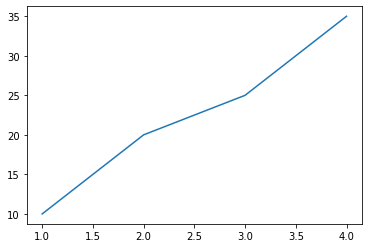

In [14]:
fig, ax = plt.subplots(nrows = 1, ncols = 1)
ax.plot([1, 2, 3, 4], [10, 20, 25, 35])

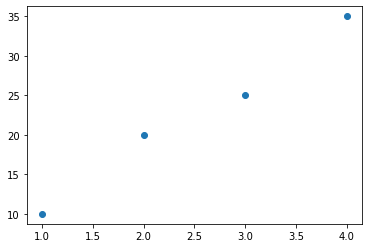

In [15]:
fig, ax = plt.subplots(nrows = 1, ncols = 1)
ax.scatter([1, 2, 3, 4], [10, 20, 25, 35])

Multiple calls to the plot function will result in multiple plots. <br>
This works with many functions in mpl (plot, scatter, bar, etc.) and assigns different colors to the different calls.

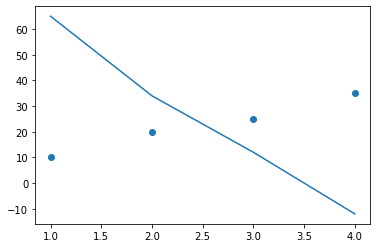

In [16]:
ax.plot([1, 2, 3, 4], [65, 34, 12, -12])
fig

<br>

## Multiple Axes
We already created figures with mutliple axes/suplots. 

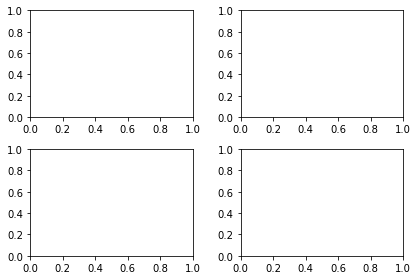

In [17]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(6,4))
fig.tight_layout()

The axes that are returned come as as an array 

In [18]:
print(type(axes))
print(type(axes[0,0]))

<class 'numpy.ndarray'>
<class 'matplotlib.axes._subplots.AxesSubplot'>


So so change the individual axes we index the array and then call the usual methods

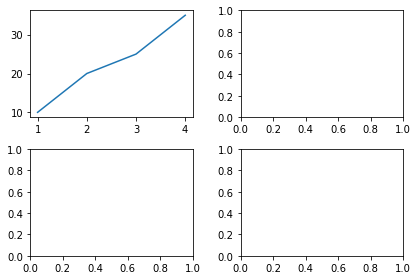

In [19]:
axes[0,0].plot([1, 2, 3, 4], [10, 20, 25, 35])
fig

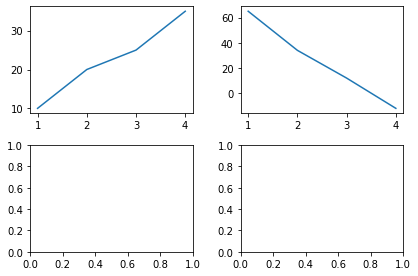

In [20]:
axes[0,1].plot([1, 2, 3, 4], [65, 34, 12, -12])
fig

#### setting `title`s and a `suptitle`

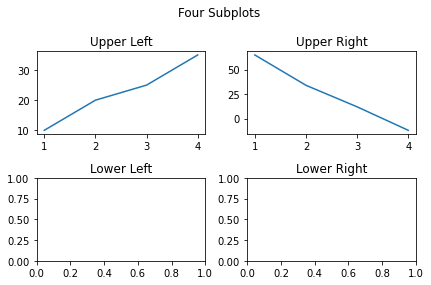

In [21]:
axes[0, 0].set(title="Upper Left")
axes[0, 1].set(title="Upper Right")
axes[1, 0].set(title="Lower Left")
axes[1, 1].set(title="Lower Right")
fig.suptitle("Four Subplots")
fig.tight_layout()
fig

## Axes methods (object oriented interface) vs. pyplot (state machine interface)

Interestingly, just about all methods of an `Axes` object exist as a function in the `pyplot` module (and vice-versa). <br>
For example, when calling `plt.xlim(1, 10)`, `pyplot` calls `ax.set_xlim(1, 10)` on whichever `Axes` is *current*. <br>
Here is an equivalent version of the above example using just `pyplot`.

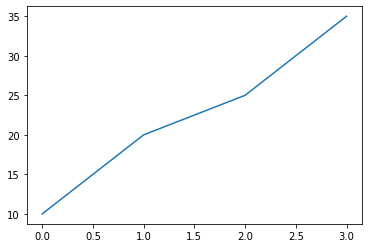

In [22]:
plt.figure()
plt.plot([10, 20, 25, 35])
plt.show()

Much cleaner, and much clearer! So, why will most of my examples not follow the pyplot approach? Because [PEP20](http://www.python.org/dev/peps/pep-0020/) "The Zen of Python" says:

"Explicit is better than implicit"

While very simple plots, with short scripts would benefit from the conciseness of the pyplot implicit approach, when doing more complicated plots, or working within larger scripts, you will want to explicitly pass around the *Axes* and/or *Figure* object to operate upon.

The advantage of keeping which axes we're working with very clear in our code will become more obvious when we start to have multiple axes in one figure.

# Plotting Functions

 Matplotlib has a number of different plotting functions -- many more than we'll cover here, in fact. There's a more complete list in the pyplot documentation, and Matplotlib gallery is a great place to get examples of all of them.  

However, a full list and/or the gallery can be a bit overwhelming at first. Instead we'll condense it down and give you a look at some of the ones you're most likely to use, and then go over a subset of those in more detail.

Here's a simplified visual overview of matplotlib's most commonly used plot types.  Let's browse through these, and then we'll go over a few in more detail. Clicking on any of these images will take you to the code that generated them. We'll skip that for now, but feel browse through it later.

In [23]:
import numpy as np
import matplotlib.pyplot as plt

## The Basics: 1D series/points

<a  href="examples/plot_example.py"><img src="images/plot_example.png"></a>
<a href="examples/scatter_example.py"><img src="images/scatter_example.png"></a>
<a href="examples/bar_example.py"><img src="images/bar_example.png"></a>
<a href="examples/fill_example.py"><img src="images/fill_example.png"></a>

## 2D Arrays and Images
<a href="examples/imshow_example.py"><img src="images/imshow_example.png"></a>
<a href="examples/pcolor_example.py"><img src="images/pcolor_example.png"></a>
<a href="examples/contour_example.py"><img src="images/contour_example.png"></a>

## Vector Fields
<a href="examples/vector_example.py"><img src="images/vector_example.png"></a>

## Data Distributions
<a href="examples/statistical_example.py"><img src="images/statistical_example.png"></a>

## Input Data: 1D Series

We've briefly mentioned `ax.plot(x, y)` and `ax.scatter(x, y)` to draw lines and points, respectively.  We'll cover some of their options (markers, colors, linestyles, etc) in the next section. Let's move on to a couple of other common plot types.

### Bar Plots: `ax.bar(...)` and `ax.barh(...)`

Bar plots are one of the most common plot types.  Matplotlib's `ax.bar(...)` method can also plot general rectangles, but the default is optimized for a simple sequence of x, y values, where the rectangles have a constant width.  There's also `ax.barh(...)` (for horizontal), which makes a constant-height assumption instead of a constant-width assumption.

### Simple bar plot

<BarContainer object of 5 artists>

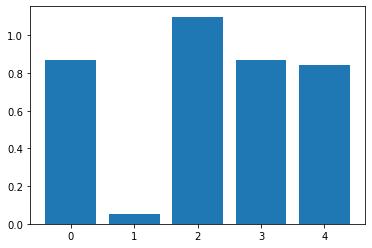

In [24]:
# seed initialization for keeping the random number same every time
np.random.seed(2)

# define X and Y values for plot
x = np.arange(5)
y = np.random.random(5) * 2

# create the subplot
# with this method it is possible to plot multiple subplots in a single figure
fig, ax = plt.subplots()

# for ploting bar plot we use .bar function provided by matplotlib
ax.bar(x, y)

#plt.show()

the x and y vlaues we can see here.

In [25]:
x

array([0, 1, 2, 3, 4])

In [26]:
y

array([0.8719898 , 0.05185246, 1.09932496, 0.87064479, 0.8407356 ])

Adding errorbars...

Matplotlib line plots and bar charts can include `error bars`. Error bars are useful to problem solvers because error bars show the confidence or precision in a set of measurements or calculated values. Bar charts without error bars give the illusion that a measured or calculated value is known to high precision or high confidence.

we can pass the argument xerr=error or yerr=error to plot the error bars in vertical or horizontal axis based on what do we want to show. 



<BarContainer object of 5 artists>

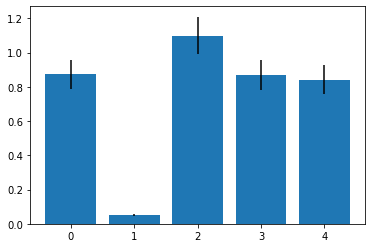

In [27]:
np.random.seed(2)
x = np.arange(5)
y = np.random.random(5) * 2

# defining error here
error = y * 0.1

fig, ax = plt.subplots()

# we pass the error here as an argument to show the errors on the plot
ax.bar(x, y, yerr=error)
#plt.show()

If we have negative values, we can use `axhline` to draw an axis "spine" to mark the zero line.



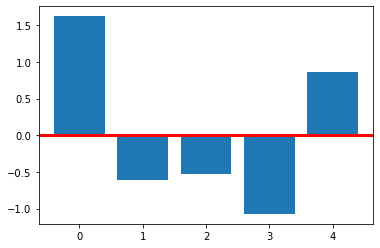

In [28]:
np.random.seed(1)
x = np.arange(5)
y = np.random.randn(5)

fig, ax = plt.subplots()
ax.bar(x, y)

# here we define the axline to mark the hrozintal axis here and pass argument to customize it. 
ax.axhline(y =0, color='red', linewidth=3)
#plt.show()

Matplotlib plotting methods return an `Artist` or a sequence of artists.  Anything you can see in a Matplotlib figure/axes/etc is an `Artist` of some sort. Most of the time, you will not need to retain these returned objects. You will want to capture them for special customizing that may not be possible through the normal plotting mechanism.

Let's re-visit that last example and modify what's plotted.  In the case of `bar`, a container artist is returned, so we'll modify its contents instead of the container itself (thus, `for bar in vert_bars`).

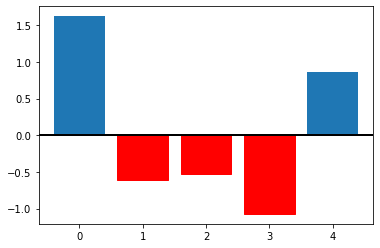

In [29]:
fig, ax = plt.subplots()

# Store the output of the call to .bar
vert_bars = ax.bar(x, y) 

# We could have also done this with two separate calls to `ax.bar` and numpy boolean indexing.
for bar, height in zip(vert_bars, y):
    # checking for the vlauses if the are less then aero/negative
    if height < 0:
        # setting custom color for the bars
        bar.set(color='red')
        
ax.axhline(y=0, color='black', linewidth=2)
#plt.show()


Looking at the artist returned by `ax.bar` we can see that they are all plain rectangles.


In [30]:
for bar in vert_bars:
    print(bar)

Rectangle(xy=(-0.4, 0), width=0.8, height=1.62435, angle=0)
Rectangle(xy=(0.6, 0), width=0.8, height=-0.611756, angle=0)
Rectangle(xy=(1.6, 0), width=0.8, height=-0.528172, angle=0)
Rectangle(xy=(2.6, 0), width=0.8, height=-1.07297, angle=0)
Rectangle(xy=(3.6, 0), width=0.8, height=0.865408, angle=0)


### Filled Regions: `ax.fill(x, y)`, `fill_between(...)`, etc

Of these functions, `ax.fill_between(...)` is probably the one you'll use the most often.  In its most basic form, it fills between the given y-values and 0:

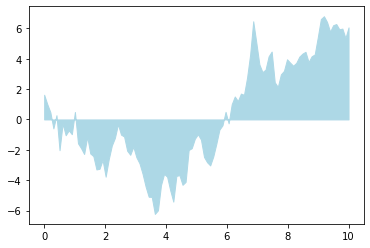

In [31]:
np.random.seed(1)
y = np.random.randn(100).cumsum()
x = np.linspace(0, 10, 100)

fig, ax = plt.subplots()
ax.fill_between(x, y, color='lightblue')
#plt.show()

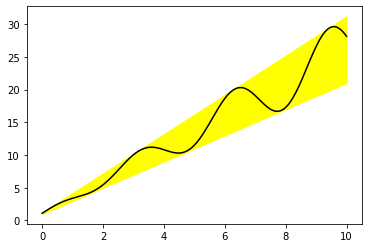

In [32]:
# creating 200 data point inbetween 0 and 10
x = np.linspace(0, 10, 200)

# defining our functions here
y1 = 2 * x + 1
y2 = 3 * x + 1.2

# calculating the mean value (just for ploiting purpose)
y_mean = 0.5 * x * np.cos(2*x) + 2.5 * x + 1.1

fig, ax = plt.subplots()

# Plot the envelope with `fill_between`
ax.fill_between(x, y1, y2, color='yellow')

# Plot the "centerline" with `plot`
ax.plot(x, y_mean, color='black')
#plt.show()


## Input Data: 2D Arrays or Images

There are several options for plotting 2D datasets.  `imshow`, `pcolor`, and `pcolormesh` have a lot of overlap, at first glance.  The image above is meant to clarify that somewhat. 


In short, `imshow` can interpolate and display large arrays very quickly, while `pcolormesh` and `pcolor` are much slower, but can handle flexible (i.e. more than just rectangular) arrangements of cells.

We won't dwell too much on the differences and overlaps here.  They have overlapping capabilities, but different default behavior because their primary use-cases are a bit different (there's also `matshow`, which is `imshow` with different defaults).  

Instead we'll focus on what they have in common.

`imshow`, `pcolor`, `pcolormesh`, `scatter`, and any other Matplotlib plotting methods that map a range of data values onto a colormap will return artists that are instances of `ScalarMappable.`  In practice, what that means is a) you can display a colorbar for them, and b) they share several keyword arguments.

### Displaying 2d data with `imshow`

In [33]:
arr_2d = np.arange(9).reshape((3, 3))
arr_2d



array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

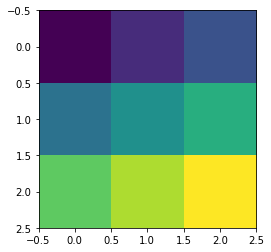

In [34]:
fig, ax = plt.subplots()
ax.imshow(arr_2d)
#plt.show()

`imshow` is used most of the times to display images.

(-0.5, 639.5, 426.5, -0.5)

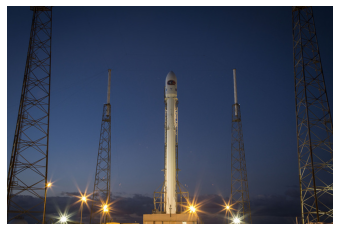

In [35]:
# Read images into numpy array. Usually imageio would be used here.
# see https://imageio.github.io/
img = plt.imread("images/rocket.png")

fig, ax = plt.subplots()
ax.imshow(img)
ax.axis("off")
#plt.show()

For visualizing matrices, `matshow` provides better defaults, e.g. axis labelling.

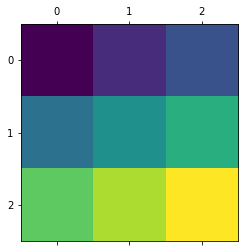

In [36]:
fig, ax = plt.subplots()
ax.matshow(arr_2d)
#plt.show()


### Colorbars

Just seeing the colors does not necessarily tell us something about the values beneath. Let's add a colorbar to the figure to display what colors correspond to values of `data` we've plotted. 

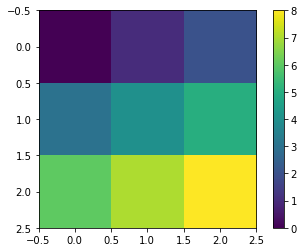

In [37]:
fig, ax = plt.subplots()
im = ax.imshow(arr_2d)

# adding coclor bar 
fig.colorbar(im)
#plt.show()


In [38]:
arr_2d

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

You may notice that `colorbar` is a `Figure` method and not an `Axes` method.  That's because `colorbar` doesn't operate on the axes. Instead, it shrinks the current axes by a bit, adds a _new_ axes to the figure, and places the colorbar on that axes.

The new axes that `fig.colorbar` creates is fairly limited in where it can be positioned.   For example, it's always outside the axes it "steals" room from. Sometimes you may want to avoid "stealing" room from an axes or maybe even have the colorbar _inside_ another axes.  In that case, you can manually create the axes for the colorbar and position it where you'd like:

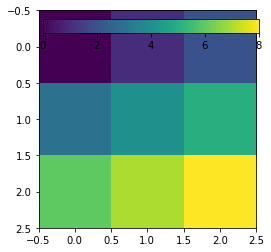

In [39]:
fig, ax = plt.subplots()

cax = fig.add_axes([0.27, 0.8, 0.5, 0.05])

#https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.axes.Axes.imshow.html

im = ax.imshow(arr_2d)
fig.colorbar(im, cax=cax, orientation='horizontal')


#plt.show()


### Shared parameters for `imshow`, `pcolormesh`, `contour`, `scatter`, etc
  
  As we mentioned earlier, any plotting method that creates a `ScalarMappable` will have some common kwargs.  The ones you'll use the most frequently are:
  
  * `cmap` : The colormap (or name of the colormap) used to display the input.  (We'll go over the different colormaps in the next section.)
  * `vmin` : The minimum data value that will correspond to the "bottom" of the colormap (defaults to the minimum of your input data).
  * `vmax` : The maximum data value that will correspond to the "top" of the colormap (defaults to the maximum of your input data).
  * `norm` : A `Normalize` instance to control how the data values are mapped to the colormap. By default, this will be a linear scaling between `vmin` and `vmax`, but other norms are available (e.g. `LogNorm`, `PowerNorm`, etc).
  
`vmin` and `vmax` are particularly useful.  Quite often, you'll want the colors to be mapped to a set range of data values, which aren't the min/max of your input data. For example, you might want a symmetric ranges of values around 0.

As an example of that, let's use a divergent colormap on some example data. Note how the colormap is **not** centered at zero.

C:\Users\argha\AppData\Local\Temp/ipykernel_12700/1479593441.py:2: MatplotlibDeprecationWarning: In a future release, get_sample_data will automatically load numpy arrays.  Set np_load to True to get the array and suppress this warning.  Set asfileobj to False to get the path to the data file and suppress this warning.
  data = np.load(get_sample_data('axes_grid/bivariate_normal.npy'))


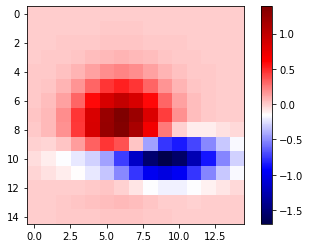

In [76]:
from matplotlib.cbook import get_sample_data
data = np.load(get_sample_data('axes_grid/bivariate_normal.npy'))

fig, ax = plt.subplots()

# https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.axes.Axes.imshow.html
im = ax.imshow(data, cmap='seismic')
fig.colorbar(im)
#plt.show()


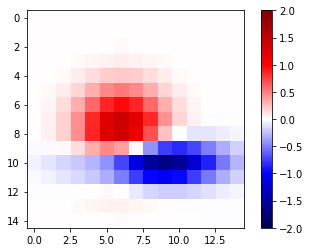

In [41]:
fig, ax = plt.subplots()
im = ax.imshow(data, cmap='seismic', vmin=-2, vmax=2)
fig.colorbar(im)
#plt.show()


## Scatter for n-dimensional data
`scatter` allows to map several dimensions to different aesthetics such as x-postion, color, size and shape.

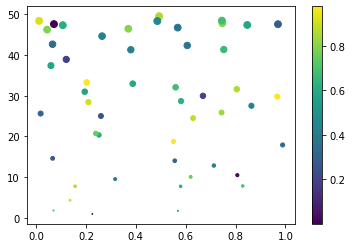

In [42]:
n = 50
x1 = np.random.random(n)
x2 = np.random.random(n) * 50
x3 = np.random.random(n)


y = x1 + x2 + x3

fig, ax = plt.subplots()
#https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.axes.Axes.scatter.html
sc = ax.scatter(x=x1, y=y, s=x2, c=x3, marker='o')
fig.colorbar(sc)
#plt.show()


There are lots of different markers mpl supports which can help to emphasize different distributions. Have a look at https://matplotlib.org/3.2.1/api/markers_api.html#module-matplotlib.markers to get a list of marker options.

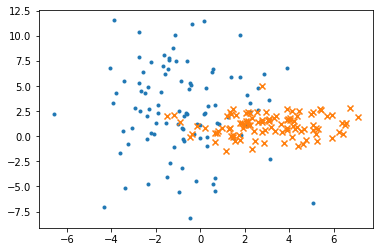

In [43]:
num = 100

x1 = np.random.normal(-1, 2, num)
y1 = np.random.normal(3, 4, num)
x2 = np.random.normal(3, 2, num)
y2 = np.random.normal(1, 1, num)

fig, ax = plt.subplots()
ax.scatter(x1, y1, marker='.')
ax.scatter(x2, y2, marker='x')
#plt.show()

## Visualizing statistical distributions

Draw samples from a normal distribution.

In [44]:
μ = 0
σ = 1
num_samples = 1000
dist = np.random.normal(μ, σ, num_samples)

**Side note on unicode characters as variables.** Since Python 3 we can use any unicode character such as μ and σ as variables. This can make sense in scientific programming if strong naming conventions exist. A good example is mean and standard deviation of a normal distribution. To easily obtain common characters you can use latex style and type e.g. `\mu` followed by <kbd>tab</kbd> to obtain μ. However, do not overuse this. Clearly named characters are often easier to read.

### Histograms
Histograms a great way to visualize univariate distributions. The data is divided into equally sized bins. Then we count how many data points fall into each bin. Finally, we draw a bar with the width of the corresponding bin and the height of the count.

The standard histogram looks like this.

(array([ 11.,  28.,  70., 158., 244., 253., 151.,  66.,  15.,   4.]),
 array([-3.15335745, -2.50591383, -1.85847021, -1.21102659, -0.56358297,
         0.08386065,  0.73130427,  1.37874789,  2.02619151,  2.67363514,
         3.32107876]),
 <BarContainer object of 10 artists>)

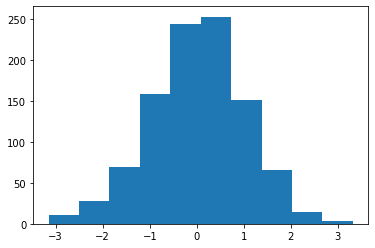

In [45]:
fig, ax = plt.subplots()
ax.hist(dist)
#plt.show()

We can control the number of bins.

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,
         0.,  0.,  2.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,
         0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         2.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  1.,  2.,
         0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  2.,  0.,  0.,  0.,  2.,
         0.,  1.,  2.,  0.,  0.,  2.,  1.,  2.,  0.,  1.,  0.,  1.,  2.,
         1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  1.,  2.,  2.,  5.,  1.,  2.,  2.,  2.,  3.,
         3.,  1.,  2.,  2.,  1.,  1.,  3.,  0.,  2.,  3.,  3.,  4.,  3.,
         1.,  2.,  2.,  0.,  2.,  1.,  2.,  2.,  3.,  3.,  3.,  3.,  3.,
         0.,  3.,  4.,  2.,  1.,  3.,  3.,  3.,  3.,  2.,  3.,  4.,  3.,
         1.,  3.,  2.,  4.,  1.,  6.,  2.,  5.,  2.

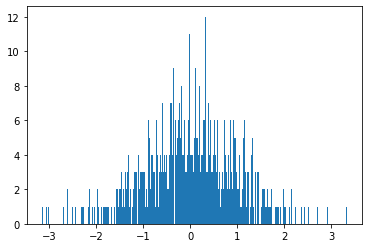

In [46]:
fig, ax = plt.subplots()
ax.hist(dist, bins=500)
#plt.show()

Or let it be automatically determined.

(array([  3.,   3.,   8.,   8.,  12.,  16.,  29.,  40.,  51.,  61.,  82.,
        104.,  94., 113.,  91.,  78.,  70.,  48.,  35.,  22.,  15.,   7.,
          6.,   1.,   2.,   1.]),
 array([-3.15335745, -2.90434067, -2.6553239 , -2.40630712, -2.15729034,
        -1.90827356, -1.65925679, -1.41024001, -1.16122323, -0.91220646,
        -0.66318968, -0.4141729 , -0.16515612,  0.08386065,  0.33287743,
         0.58189421,  0.83091098,  1.07992776,  1.32894454,  1.57796132,
         1.82697809,  2.07599487,  2.32501165,  2.57402842,  2.8230452 ,
         3.07206198,  3.32107876]),
 <BarContainer object of 26 artists>)

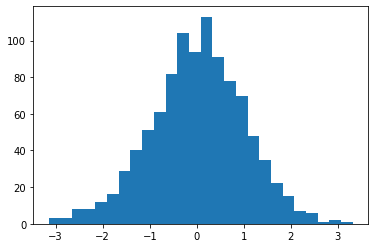

In [47]:
fig, ax = plt.subplots()
ax.hist(dist, bins='auto')
#plt.show()

Using `density=True` will create a normalized histogram that can be interpreted as a probability density. 

(array([0.01204738, 0.01204738, 0.03212635, 0.03212635, 0.04818952,
        0.0642527 , 0.11645802, 0.16063175, 0.20480548, 0.24496341,
        0.32929508, 0.41764254, 0.37748461, 0.45378469, 0.36543722,
        0.31323191, 0.28110556, 0.1927581 , 0.14055278, 0.08834746,
        0.06023691, 0.02811056, 0.02409476, 0.00401579, 0.00803159,
        0.00401579]),
 array([-3.15335745, -2.90434067, -2.6553239 , -2.40630712, -2.15729034,
        -1.90827356, -1.65925679, -1.41024001, -1.16122323, -0.91220646,
        -0.66318968, -0.4141729 , -0.16515612,  0.08386065,  0.33287743,
         0.58189421,  0.83091098,  1.07992776,  1.32894454,  1.57796132,
         1.82697809,  2.07599487,  2.32501165,  2.57402842,  2.8230452 ,
         3.07206198,  3.32107876]),
 <BarContainer object of 26 artists>)

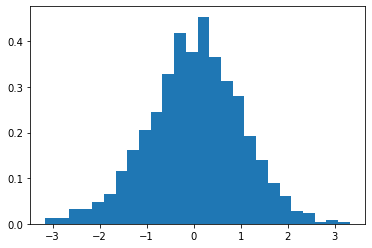

In [48]:
fig, ax = plt.subplots()
ax.hist(dist, bins='auto', density=True)
#plt.show()

### Boxplots
Boxplots are another standard way to summarize univariate distributions. The give a compact visual description of important *summary statistics*. 
A box is drawn at the 25% and 75% quantile, that is where most of the data is. Additionally, the median is marked by a line inside the box.
The *whiskers* extend 1.5 times the *inter quartile range* beyond the quartiles. Every point beyond that is drawn individually as a *flier* or *outlier*. See also https://flowingdata.com/2008/02/15/how-to-read-and-use-a-box-and-whisker-plot/ for a nice illustration.

{'whiskers': [<matplotlib.lines.Line2D at 0x1c7a25e2100>,
 'caps': [<matplotlib.lines.Line2D at 0x1c7a25e2820>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c7a1602d30>],
 'medians': [<matplotlib.lines.Line2D at 0x1c7a25e2f40>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c7a25eb310>],
 'means': []}

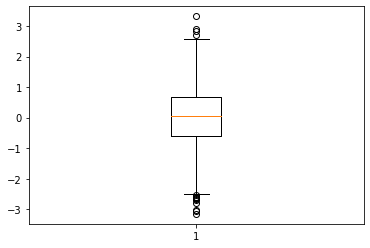

In [49]:
fig, ax = plt.subplots()
ax.boxplot(dist)
#plt.show()

`boxplot` can also be used to display several distributions at once.

In [50]:
import reprlib # This is for obtaining printable versions of large data sets.
means = [0, -1, 2.5, 4.3, -3.6]
sigmas = [1.2, 5, 3, 1.5, 2]
# Each distribution has a different number of samples.
nums = [150, 1000, 100, 200, 500]

dists = [np.random.normal(*args) for args in zip(means, sigmas, nums)]
reprlib.repr(dists)

'[array([ 2.616...08413127e+00]), array([ -7.88... -5.45628819]), array([ 3.249...  1.8530462 ]), array([3.5523..., 5.12353406]), array([-4.204...78190226e+00])]'

{'whiskers': [<matplotlib.lines.Line2D at 0x1c7a2640580>,
 'caps': [<matplotlib.lines.Line2D at 0x1c7a2640ca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c7a26401c0>,
 'medians': [<matplotlib.lines.Line2D at 0x1c7a265c400>,
 'fliers': [<matplotlib.lines.Line2D at 0x1c7a265c790>,
 'means': []}

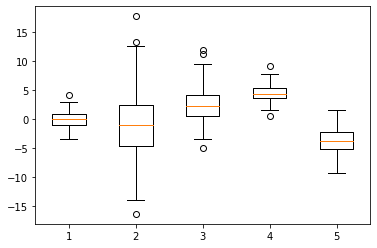

In [51]:
fig, ax = plt.subplots()
ax.boxplot(dists)
#plt.show()

### Violinplots
Violinplots are a third common way to visualize distributions. For violinplots a *kernel density estimate* is computed for the whole range of data. This gives a smooth estimate of the probabiliy density function underlying the data.
The `violinplot`function behaves similar to `boxplot`. For further information, have a look at https://en.wikipedia.org/wiki/Violin_plot.

{'bodies': [<matplotlib.collections.PolyCollection at 0x1c7a2712520>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1c7a2712490>,
 'cmins': <matplotlib.collections.LineCollection at 0x1c7a2712a60>,
 'cbars': <matplotlib.collections.LineCollection at 0x1c7a2712d90>}

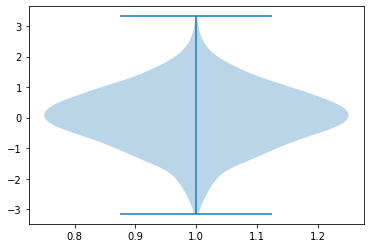

In [52]:
fig, ax = plt.subplots()
ax.violinplot(dist)
#plt.show()

{'bodies': [<matplotlib.collections.PolyCollection at 0x1c7a27762b0>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x1c7a2776220>,
 'cmins': <matplotlib.collections.LineCollection at 0x1c7a27845b0>,
 'cbars': <matplotlib.collections.LineCollection at 0x1c7a27849a0>}

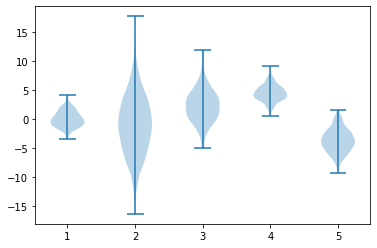

In [53]:
fig, ax = plt.subplots()
ax.violinplot(dists)
#plt.show()

### Pie charts
Pie charts a well known way to visualize categorical distributions.

([<matplotlib.patches.Wedge at 0x1c7a27ec340>,
 [Text(1.0005951890558762, 0.4569565270769591, 'Frogs'),
  Text(-0.15654637770487634, 1.0888035780743386, 'Hogs'),
  Text(-0.8313244827396928, -0.7203468639465174, 'Dogs'),
  Text(0.9253789316708984, -0.5947048283136996, 'Logs')],
 [Text(0.5457791940304778, 0.2492490147692504, '13.6%'),
  Text(-0.0853889332935689, 0.593892860767821, '27.3%'),
  Text(-0.45344971785801425, -0.3929164712435549, '40.9%'),
  Text(0.5047521445477626, -0.3243844518074725, '18.2%')])

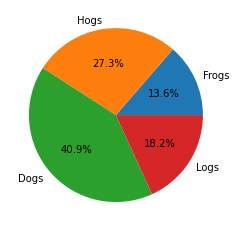

In [54]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 20]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

#plt.show()

We will cover more advanced and more convenient methods for statistical visualization in a later lecture.

## Annotating plots
Especially for scientific figures, you often want to hightlight the part of a plot that supports your hypothesis. With maplotlib you have the full flexibility to do this using `annotate`. By default it will just add text at certain x, y coordinate.  

[(-2.0, 2.0)]

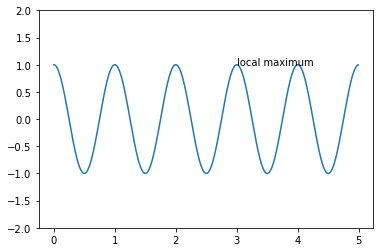

In [55]:
fig, ax = plt.subplots()

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)

# Plot a line and add some simple annotations
line, = ax.plot(t, s)
ax.annotate('local maximum', xy=(3, 1))
ax.set(ylim=(-2, 2))
#plt.show()

We can also put the text at a different x, y-coordinat using the `xytext` argument.

[(-2.0, 2.0)]

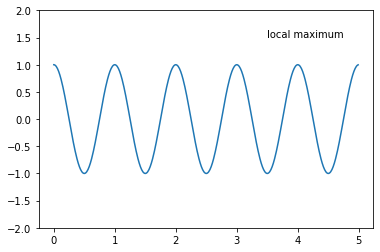

In [56]:
fig, ax = plt.subplots()

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)

line, = ax.plot(t, s)
ax.annotate(
    'local maximum', 
    xy=(3, 1), 
    xytext=(3.5, 1.5)
)

ax.set(ylim=(-2, 2))
#plt.show()

Now that we have two x, y - coordinates we can connect them using arrows.

[(-2.0, 2.0)]

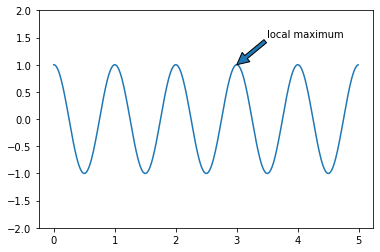

In [57]:
fig, ax = plt.subplots()

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)

# Plot a line and add some simple annotations
line, = ax.plot(t, s)
ax.annotate(
    'local maximum', 
    xy=(3, 1), 
    xytext=(3.5, 1.5),
    arrowprops=dict()
)

ax.set(ylim=(-2, 2))


If we have to, we can go very fancy on the arrow styles. See https://matplotlib.org/tutorials/text/annotations.html for a detailed overview.

[(-2.0, 2.0)]

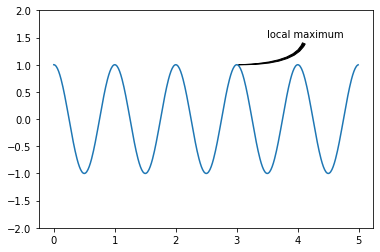

In [58]:
fig, ax = plt.subplots()

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)

# Plot a line and add some simple annotations
line, = ax.plot(t, s)
ax.annotate(
    'local maximum', 
    xy=(3, 1), 
    xytext=(3.5, 1.5),
    arrowprops=dict(arrowstyle='wedge', connectionstyle="angle3", facecolor="black")
)

ax.set(ylim=(-2, 2))
#plt.show()

## Markers
[Markers](http://matplotlib.org/api/markers_api.html) are commonly used in [`plot()`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) and [`scatter()`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter) plots, but also show up elsewhere. There is a wide set of markers available, and custom markers can even be specified.

marker     |  description  | marker    |  description    |marker    |  description  | marker    |  description  
:----------|:--------------| :---------|:--------------  |:---------|:--------------| :---------|:--------------
"."        |  point        | "+"       |  plus           |","       |  pixel        | "x"       |  cross
"o"        |  circle       | "D"       |  diamond        |"d"       |  thin_diamond |           |
"8"        |  octagon      | "s"       |  square         |"p"       |  pentagon     | "\*"      |  star
"&#124;"   |  vertical line| "\_"      | horizontal line | "h"      |  hexagon1     | "H"       |  hexagon2
0          |  tickleft     | 4         |  caretleft      |"<"       | triangle_left | "3"       |  tri_left
1          |  tickright    | 5         |  caretright     |">"       | triangle_right| "4"       |  tri_right
2          |  tickup       | 6         |  caretup        |"^"       | triangle_up   | "2"       |  tri_up
3          |  tickdown     | 7         |  caretdown      |"v"       | triangle_down | "1"       |  tri_down
"None"     |  nothing      | `None`    |  default        |" "       |  nothing      |""         |  nothing


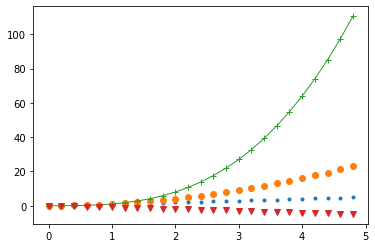

In [59]:
t = np.arange(0.0, 5.0, 0.2)
fig, ax = plt.subplots()
ax.plot(t, t, '.', linewidth=5)
ax.plot(t, t**2, 'o', linewidth=5)
ax.plot(t, t**3, marker='+', linewidth=1) # With explicit arguments, you can set maker and linestyle separately.
ax.plot(t, -t, ls='', marker='v', linewidth=5) 
#plt.show()

## Linestyles
Line styles are about as commonly used as colors. There are a few predefined linestyles available to use. Note that there are some advanced techniques to specify some custom line styles. [Here](http://matplotlib.org/1.3.0/examples/lines_bars_and_markers/line_demo_dash_control.html) is an example of a custom dash pattern.

linestyle          | description
-------------------|------------------------------
'-'                | solid
'--'               | dashed
'-.'               | dashdot
':'                | dotted
'None'             | draw nothing
' '                | draw nothing
''                 | draw nothing

Also, don't mix up ".-" (line with dot markers) and "-." (dash-dot line) when using the ``plot`` function!

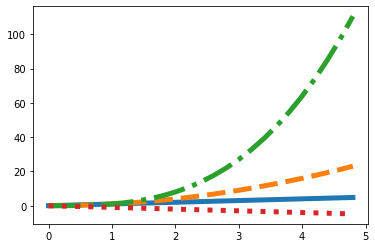

In [60]:
t = np.arange(0.0, 5.0, 0.2)
fig, ax = plt.subplots()
ax.plot(t, t, linestyle='-', linewidth=5)
ax.plot(t, t**2, linestyle='--', linewidth=5)
ax.plot(t, t**3, linestyle='-.', linewidth=5)
ax.plot(t, -t, linestyle=':', linewidth=5)
#plt.show()

<BarContainer object of 4 artists>

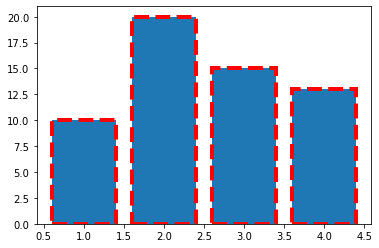

In [61]:
fig, ax = plt.subplots(1, 1)
ax.bar([1, 2, 3, 4], [10, 20, 15, 13], linestyle='--', edgecolor='r', linewidth=4)
#plt.show()

## Colormaps
Another very important property of many figures is the colormap. The job of a colormap is to relate a scalar value to a color. In addition to the regular portion of the colormap, an "over", "under" and "bad" color can be optionally defined as well. NaNs will trigger the "bad" part of the colormap.

As we all know, we create figures in order to convey information visually to our readers. There is much care and consideration that have gone into the design of these colormaps. Your choice in which colormap to use depends on what you are displaying. In mpl, the "jet" colormap has historically been used by default, but it will often not be the colormap you would want to use. Much discussion has taken place on the mailing lists with regards to what colormap should be default. The v2.0 release of Matplotlib adopted a new default colormap, 'viridis', along with some other stylistic changes to the defaults.

[Here is the talk](https://www.youtube.com/watch?v=xAoljeRJ3lU) by Nathaniel Smith and Stéfan van der Walt at SciPy 2015 that does an excelent job explaining colormaps and how the new perceptual uniform colormaps where designed.



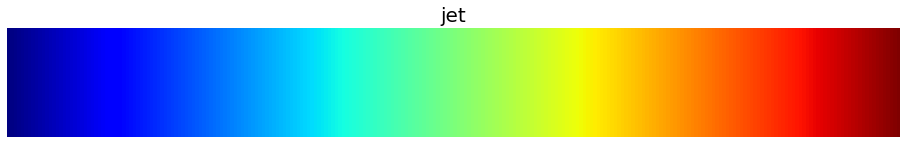

In [62]:
def plot_cmap(name, value_range=(0, 1)):
    gradient = np.linspace(*value_range, 256)
    gradient = np.vstack((gradient, gradient))
    fig, ax = plt.subplots(figsize=plt.figaspect(0.1))
    ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name), vmin=0, vmax=1)
    pos = list(ax.get_position().bounds)
    x_text = pos[0] - 0.01
    y_text = pos[1] + pos[3]/2.
    ax.set_title(name, fontsize=20)
    ax.axis("off")

plot_cmap("jet")

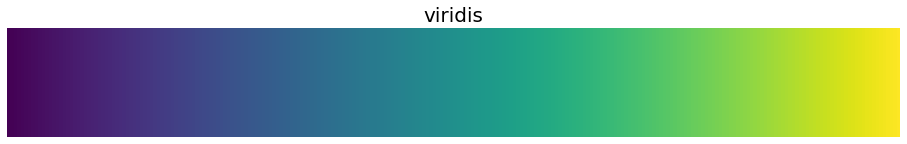

In [63]:
plot_cmap("viridis")

Here you can find the full gallery of all the pre-defined colormaps, organized by the types of data they are usually used for: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

## Mathtext
Oftentimes, you just simply need that superscript or some other math text in your labels. Matplotlib provides a very easy way to do this for those familiar with LaTeX. Any text that is surrounded by dollar signs will be treated as "[mathtext](http://matplotlib.org/users/mathtext.html#mathtext-tutorial)". Do note that because backslashes are prevelent in LaTeX, it is often a good idea to prepend an `r` to your string literal so that Python will not treat the backslashes as escape characters.

In [64]:
print(r"a\nb")

a\nb


Text(0.5, 1.0, '$\\sigma_i=\\frac{3}{5}$')

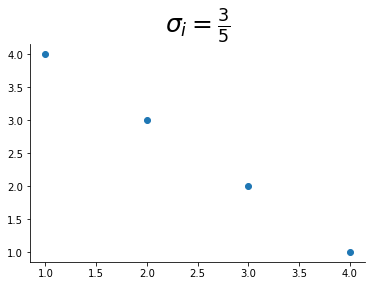

In [65]:
fig, ax = plt.subplots()
ax.scatter([1, 2, 3, 4], [4, 3, 2, 1])
ax.spines['top'].set(visible=False)  # Removing spines so they don't intersect with the title. tight_layout() is not sufficient here.
ax.spines['right'].set(visible=False)
ax.set_title(r'$\sigma_i=\frac{3}{5}$', fontsize=25)
#plt.show()

# Limits, Legends and Layouts

In this section, we'll focus on what happens around the edges of the axes:  Ticks, ticklabels, limits, layouts, and legends.

## Legends

As you've seen in some of the examples so far, the X and Y axis can also be labeled, as well as the subplot itself via the title. 

However, another thing you can label is the line/point/bar/etc that you plot.  You can provide a label to your plot, which allows your legend to automatically build itself. 

[Text(0, 0.5, 'Temperature (deg C)'),
 Text(0.5, 0, 'Time'),
 Text(0.5, 1.0, 'A tale of two cities')]

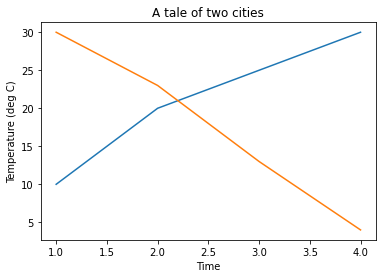

In [66]:
fig, ax = plt.subplots()
ax.plot([1, 2, 3, 4], [10, 20, 25, 30])  # Philadelphia
ax.plot([1, 2, 3, 4], [30, 23, 13, 4])  # Boston
ax.set(ylabel='Temperature (deg C)', xlabel='Time', title='A tale of two cities')
#plt.show()

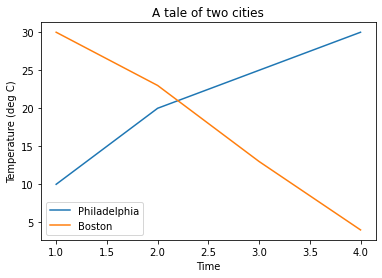

In [67]:
fig, ax = plt.subplots()
ax.plot([1, 2, 3, 4], [10, 20, 25, 30], label='Philadelphia')
ax.plot([1, 2, 3, 4], [30, 23, 13, 4], label='Boston')
ax.set(ylabel='Temperature (deg C)', xlabel='Time', title='A tale of two cities')
ax.legend()
#plt.show()

The keyword argument `loc` allows to position the legend at different positions. The `'best'` argument is the default one which automatically chooses the location which overlaps the plot elements as little as possbile.

| Location String | Location Code |
| --- | --- |
| best | 0 |
| upper right | 1 |
| upper left | 2 |
| lower left | 3 |
| lower right | 4 |
| right | 5 |
| center left | 6 |
| center right | 7 |
| lower center | 8 |
| upper center | 9 |
| center | 10 |

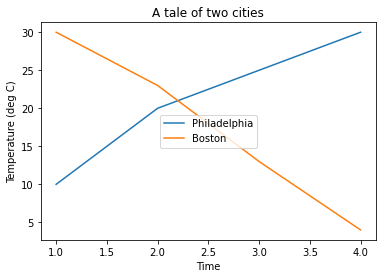

In [68]:
fig, ax = plt.subplots()
ax.plot([1, 2, 3, 4], [10, 20, 25, 30], label='Philadelphia')
ax.plot([1, 2, 3, 4], [30, 23, 13, 4], label='Boston')
ax.set(ylabel='Temperature (deg C)', xlabel='Time', title='A tale of two cities')
ax.legend(loc="center")
#plt.show()

## Ticks, Tick Lines, Tick Labels and Tickers
This is a constant source of confusion:

* A Tick is the *location* of a Tick Label.
* A Tick Line is the line that denotes the location of the tick.
* A Tick Label is the text that is displayed at that tick.
* A [`Ticker`](http://matplotlib.org/api/ticker_api.html#module-matplotlib.ticker) automatically determines the ticks for an Axis and formats the tick labels.

[`tick_params()`](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.tick_params) is often used to help configure your tickers.

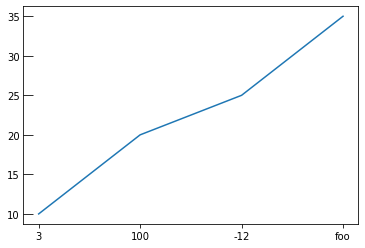

In [69]:
fig, ax = plt.subplots()
ax.plot([1, 2, 3, 4], [10, 20, 25, 35])

# Manually set ticks and tick labels *on the x-axis* (note ax.xaxis.set, not ax.set!)
ax.xaxis.set(ticks=range(1, 5), ticklabels=[3, 100, -12, "foo"]) 

# Make the y-ticks a bit longer and go both in and out...
ax.tick_params(axis='y', direction='in', length=10)

#plt.show()

[[<matplotlib.axis.XTick at 0x1c7a2eb6910>,
 [Text(0, 0, 'apples'), Text(1, 0, 'oranges'), Text(2, 0, 'peaches')]]

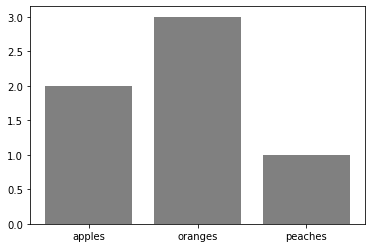

In [70]:
data = [('apples', 2), ('oranges', 3), ('peaches', 1)]
fruit, value = zip(*data)

fig, ax = plt.subplots()
x = np.arange(len(fruit))
ax.bar(x, value, align='center', color='gray')
ax.set(xticks=x, xticklabels=fruit)
#plt.show()

## Subplot Spacing
The spacing between the subplots can be adjusted using [`fig.subplots_adjust()`](http://matplotlib.org/api/pyplot_api.html?#matplotlib.pyplot.subplots_adjust). Play around with the example below to see how the different arguments affect the spacing.

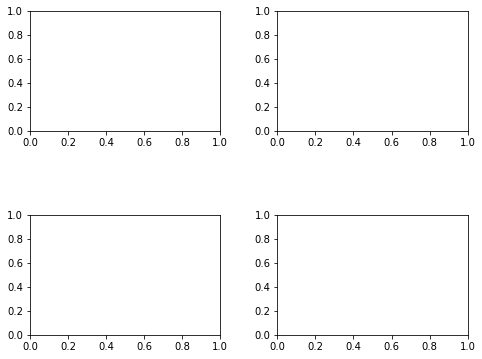

In [71]:
fig, axes = plt.subplots(2, 2, figsize=(9, 9))
fig.subplots_adjust(wspace=0.3, hspace=0.7,
                   left=0.125, right=0.8,
                   top=0.7,    bottom=0.2)
#plt.show()

A common "gotcha" is that the labels are not automatically adjusted to avoid overlapping those of another subplot. Matplotlib does not currently have any sort of robust layout engine, as it is a design decision to minimize the amount of "magical plotting". We intend to let users have complete, 100% control over their plots. LaTeX users would be quite familiar with the amount of frustration that can occur with automatic placement of figures in their documents.

That said, there have been some efforts to develop tools that users can use to help address the most common compaints. The "[Tight Layout](http://matplotlib.org/users/tight_layout_guide.html)" feature, when invoked, will attempt to resize margins and subplots so that nothing overlaps.

If you have multiple subplots, and want to avoid overlapping titles/axis labels/etc, `fig.tight_layout` is a great way to do so:

In [72]:
def example_plot(ax):
    ax.plot([1, 2])
    ax.set_xlabel('x-label', fontsize=16)
    ax.set_ylabel('y-label', fontsize=8)
    ax.set_title('Title', fontsize=24)

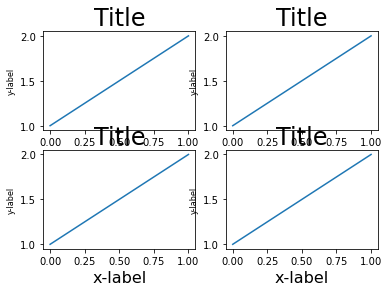

In [73]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
example_plot(ax1)
example_plot(ax2)
example_plot(ax3)
example_plot(ax4)

#plt.show()

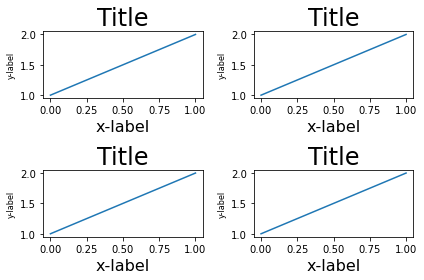

In [74]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
example_plot(ax1)
example_plot(ax2)
example_plot(ax3)
example_plot(ax4)

# Tight layout enabled.
fig.tight_layout()

#plt.show()

# mplot3d
By taking advantage of Matplotlib's z-order layering engine, mplot3d emulates 3D plotting by projecting 3D data into 2D space, layer by layer. While it isn't going to replace any of the true 3D plotting libraries anytime soon, its goal is to allow for Matplotlib users to produce 3D plots with the same amount of simplicity as 2D plots.

In [ ]:
%matplotlib widget

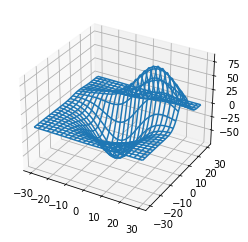

In [78]:
from mpl_toolkits.mplot3d import Axes3D, axes3d

fig, ax = plt.subplots(1, 1, subplot_kw={'projection': '3d'})
X, Y, Z = axes3d.get_test_data(0.05)
ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5)

#plt.show()

# Further Readings
Matplotlib chapter from Jake VanderPlas's "Python Data Science Handbook" https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html

[Matplotlib tutorial from Scipy 2018](https://youtu.be/6gdNUDs6QPc)

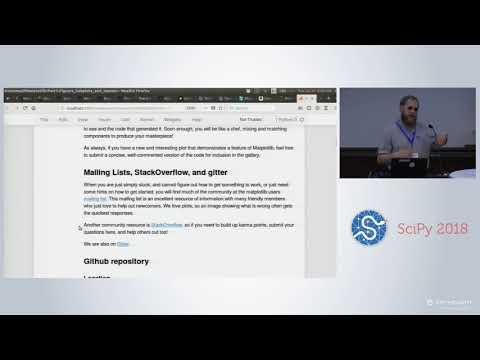

In [79]:
from IPython.display import YouTubeVideo
YouTubeVideo("6gdNUDs6QPc")

In [80]:
import numpy as np
import matplotlib.pyplot as plt

# How to speak "MPL"
In the previous parts, you learned how Matplotlib organizes plot-making by figures and axes. We broke down the components of a basic figure and learned how to create them. You also learned how to add one or more axes to a figure, and how to tie them together. You even learned how to change some of the basic appearances of the axes. Finally, we went over some of the many plotting methods that Matplotlib has to draw on those axes. With all that knowledge, you should be off making great and wonderful figures.

Why are you still here?

"We don't know how to control our plots and figures!" says some random voice in the back of the room.

Of course! While the previous sections may have taught you some of the structure and syntax of Matplotlib, it did not describe much of the substance and vocabulary of the library. This section will go over many of the properties that are used throughout the library. Note that while many of the examples in this section may show one way of setting a particular property, that property may be applicible elsewhere in completely different context. This is the "language" of Matplotlib.

## Colors
This is, perhaps, the most important piece of vocabulary in Matplotlib. Given that Matplotlib is a plotting library, colors are associated with everything that is plotted in your figures. Matplotlib supports a [very robust language](http://matplotlib.org/api/colors_api.html#module-matplotlib.colors) for specifying colors that should be familiar to a wide variety of users.

[By default](https://matplotlib.org/stable/gallery/color/color_cycle_default.html) matplotlib will choose different colors when combining data on the same axes.

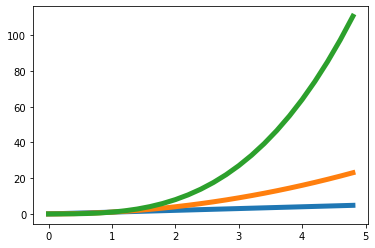

In [81]:
t = np.arange(0.0, 5.0, 0.2)
fig, ax = plt.subplots()
ax.plot(t, t, linewidth=5)
ax.plot(t, t**2, linewidth=5)
ax.plot(t, t**3, linewidth=5)
plt.show()

### Colornames
First, colors can be given as strings. For very basic colors, you can even get away with just a single letter:

- b: blue
- g: green
- r: red
- c: cyan
- m: magenta
- y: yellow
- k: black
- w: white

Other colornames that are allowed are the HTML/CSS colornames such as "burlywood" and "chartreuse". See the [full list](https://www.w3schools.com/colors/colors_names.asp) of the 147 colornames.

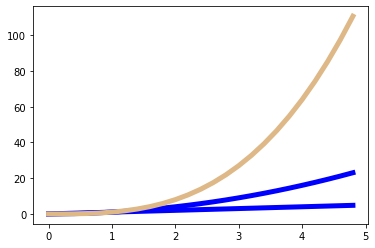

In [82]:
t = np.arange(0.0, 5.0, 0.2)
fig, ax = plt.subplots()
ax.plot(t, t, linewidth=5, color="b")
ax.plot(t, t**2, linewidth=5, color="blue")
ax.plot(t, t**3, linewidth=5, color="burlywood")
plt.show()

### Hex values
Colors can also be specified by supplying a HTML/CSS hex string, such as `'#0000FF'` for blue. Support for an optional alpha channel was added for v2.0. For more information about hex colors have a look at https://en.wikipedia.org/wiki/Web_colors#Hex_triplet.

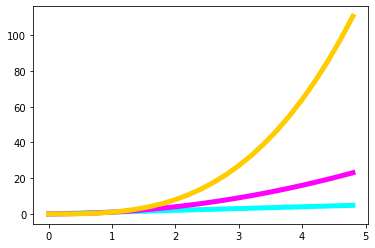

In [83]:
t = np.arange(0.0, 5.0, 0.2)
fig, ax = plt.subplots()
ax.plot(t, t, linewidth=5, color='#00ffff')
ax.plot(t, t**2, linewidth=5, color='#ff00ff')
ax.plot(t, t**3, linewidth=5, color='#ffcc00')
plt.show()

### RGB[A] tuples
You may come upon instances where the previous ways of specifying colors do not work. This can sometimes happen in some of the deeper, stranger levels of the library. When all else fails, the universal language of colors for matplotlib is the RGB[A] tuple. This is the "Red", "Green", "Blue", and sometimes "Alpha" tuple of floats in the range of [0, 1]. One means full saturation of that channel, so a red RGBA tuple would be `(1.0, 0.0, 0.0, 1.0)`, whereas a partly transparent green RGBA tuple would be `(0.0, 1.0, 0.0, 0.75)`.  The documentation will usually specify whether it accepts RGB or RGBA tuples. Sometimes, a list of tuples would be required for multiple colors, and you can even supply a Nx3 or Nx4 numpy array in such cases.

In functions such as `plot()` and `scatter()`, while it may appear that they can take a color specification, what they really need is a "format specification", which includes color as part of the format. Unfortunately, such specifications are string only and so RGB[A] tuples are not supported for such arguments (but you can still pass an RGB[A] tuple for a "color" argument).

Oftentimes there is a separate argument for "alpha" where-ever you can specify a color. The value for "alpha" will usually take precedence over the alpha value in the RGBA tuple. There is no easy way around this inconsistency.

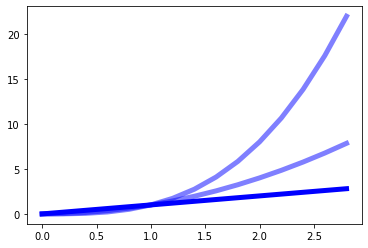

In [84]:
t = np.arange(0.0, 3.0, 0.2)
fig, ax = plt.subplots()
ax.plot(t, t, linewidth=5, color=(0, 0, 1))
ax.plot(t, t**2, linewidth=5, color=(0, 0, 1, 0.5))
# the alpha value can also be specified as an additional kwarg
ax.plot(t, t**3, linewidth=5, color="b", alpha=0.5)
plt.show()

### 256 Shades of Gray
A gray level can be given instead of a color by passing a string representation of a number between 0 and 1 (inclusive). `'0.0'` is black, while `'1.0'` is white. `'0.75'` would be a light shade of gray.


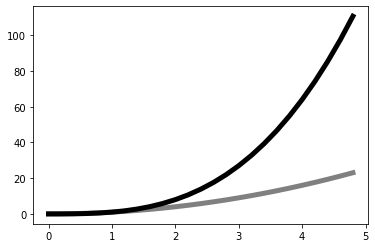

In [85]:
t = np.arange(0.0, 5.0, 0.2)
fig, ax = plt.subplots()
ax.plot(t, t, linewidth=5, color='1.0')
ax.plot(t, t**2, linewidth=5, color='0.5')
ax.plot(t, t**3, linewidth=5, color='0.0')
plt.show()

### Cycle references
With the advent of fancier color cycles coming from the many available styles, users needed a way to reference those colors in the style without explicitly knowing what they are. So, in v2.0, the ability to reference the first 10 iterations of the color cycle was added. Whereever one could specify a color, you can supply a 2 character string of 'C#'. So, 'C0' would be the first color, 'C1' would be the second, and so on and so forth up to 'C9'.

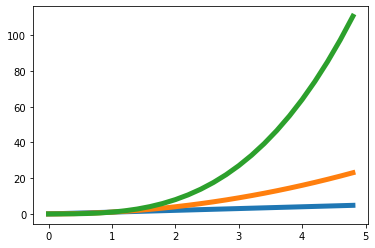

In [86]:
t = np.arange(0.0, 5.0, 0.2)
fig, ax = plt.subplots()
ax.plot(t, t, linewidth=5)
ax.plot(t, t**2, linewidth=5)
ax.plot(t, t**3, linewidth=5)
plt.show()

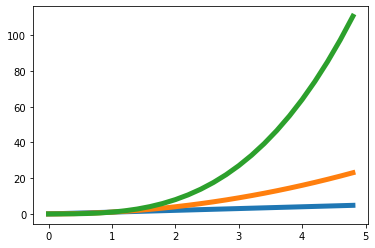

In [87]:
t = np.arange(0.0, 5.0, 0.2)
fig, ax = plt.subplots()
ax.plot(t, t, linewidth=5, color='C0')
ax.plot(t, t**2, linewidth=5, color='C1')
ax.plot(t, t**3, linewidth=5, color='C2')
plt.show()

## Markers
[Markers](http://matplotlib.org/api/markers_api.html) are commonly used in [`plot()`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) and [`scatter()`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter) plots, but also show up elsewhere. There is a wide set of markers available, and custom markers can even be specified.

marker     |  description  | marker    |  description    |marker    |  description  | marker    |  description  
:----------|:--------------| :---------|:--------------  |:---------|:--------------| :---------|:--------------
"."        |  point        | "+"       |  plus           |","       |  pixel        | "x"       |  cross
"o"        |  circle       | "D"       |  diamond        |"d"       |  thin_diamond |           |
"8"        |  octagon      | "s"       |  square         |"p"       |  pentagon     | "\*"      |  star
"&#124;"   |  vertical line| "\_"      | horizontal line | "h"      |  hexagon1     | "H"       |  hexagon2
0          |  tickleft     | 4         |  caretleft      |"<"       | triangle_left | "3"       |  tri_left
1          |  tickright    | 5         |  caretright     |">"       | triangle_right| "4"       |  tri_right
2          |  tickup       | 6         |  caretup        |"^"       | triangle_up   | "2"       |  tri_up
3          |  tickdown     | 7         |  caretdown      |"v"       | triangle_down | "1"       |  tri_down
"None"     |  nothing      | `None`    |  default        |" "       |  nothing      |""         |  nothing


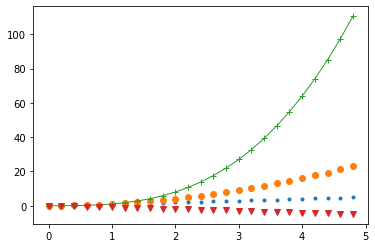

In [88]:
t = np.arange(0.0, 5.0, 0.2)
fig, ax = plt.subplots()
ax.plot(t, t, '.', linewidth=5)
ax.plot(t, t**2, 'o', linewidth=5)
ax.plot(t, t**3, marker='+', linewidth=1) # With explicit arguments, you can set maker and linestyle separately.
ax.plot(t, -t, ls='', marker='v', linewidth=5) 
plt.show()

## Linestyles
Line styles are about as commonly used as colors. There are a few predefined linestyles available to use. Note that there are some advanced techniques to specify some custom line styles. [Here](http://matplotlib.org/1.3.0/examples/lines_bars_and_markers/line_demo_dash_control.html) is an example of a custom dash pattern.

linestyle          | description
-------------------|------------------------------
'-'                | solid
'--'               | dashed
'-.'               | dashdot
':'                | dotted
'None'             | draw nothing
' '                | draw nothing
''                 | draw nothing

Also, don't mix up ".-" (line with dot markers) and "-." (dash-dot line) when using the ``plot`` function!

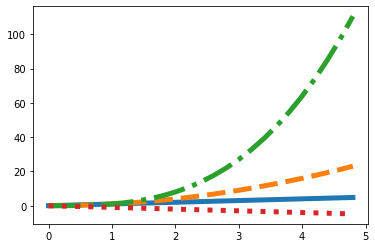

In [89]:
t = np.arange(0.0, 5.0, 0.2)
fig, ax = plt.subplots()
ax.plot(t, t, linestyle='-', linewidth=5)
ax.plot(t, t**2, linestyle='--', linewidth=5)
ax.plot(t, t**3, linestyle='-.', linewidth=5)
ax.plot(t, -t, linestyle=':', linewidth=5)
plt.show()

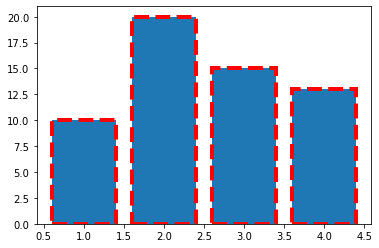

In [90]:
fig, ax = plt.subplots(1, 1)
ax.bar([1, 2, 3, 4], [10, 20, 15, 13], linestyle='--', edgecolor='r', linewidth=4)
plt.show()

## Colormaps
Another very important property of many figures is the colormap. The job of a colormap is to relate a scalar value to a color. In addition to the regular portion of the colormap, an "over", "under" and "bad" color can be optionally defined as well. NaNs will trigger the "bad" part of the colormap.

As we all know, we create figures in order to convey information visually to our readers. There is much care and consideration that have gone into the design of these colormaps. Your choice in which colormap to use depends on what you are displaying. In mpl, the "jet" colormap has historically been used by default, but it will often not be the colormap you would want to use. Much discussion has taken place on the mailing lists with regards to what colormap should be default. The v2.0 release of Matplotlib adopted a new default colormap, 'viridis', along with some other stylistic changes to the defaults.

[Here is the talk](https://www.youtube.com/watch?v=xAoljeRJ3lU) by Nathaniel Smith and Stéfan van der Walt at SciPy 2015 that does an excelent job explaining colormaps and how the new perceptual uniform colormaps where designed.



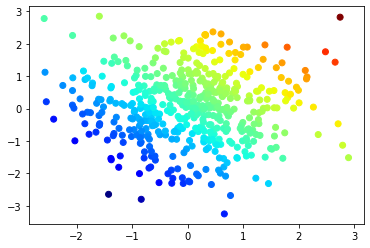

In [91]:
example_x = np.random.normal(size=500)
example_y = np.random.normal(size=500)
example_z = example_x + example_y

plt.scatter(example_x, example_y, c=example_z, cmap="jet")
plt.show()

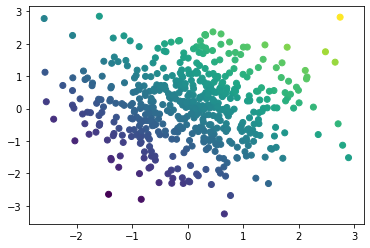

In [92]:
plt.scatter(example_x, example_y, c=example_z, cmap="viridis")
plt.show()

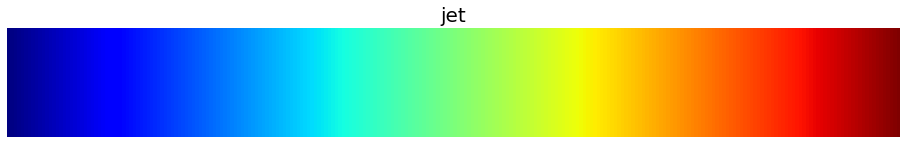

In [93]:
def plot_cmap(name, value_range=(0, 1)):
    gradient = np.linspace(*value_range, 256)
    gradient = np.vstack((gradient, gradient))
    fig, ax = plt.subplots(figsize=plt.figaspect(0.1))
    ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name), vmin=0, vmax=1)
    pos = list(ax.get_position().bounds)
    x_text = pos[0] - 0.01
    y_text = pos[1] + pos[3]/2.
    ax.set_title(name, fontsize=20)
    ax.axis("off")

plot_cmap("jet")

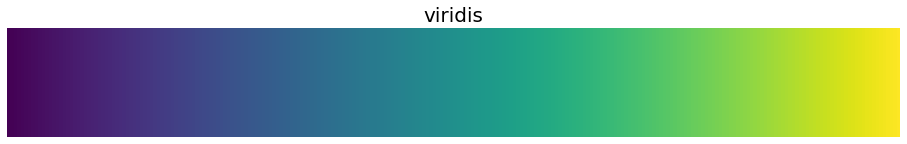

In [94]:
plot_cmap("viridis")

Here you can find the full gallery of all the pre-defined colormaps, organized by the types of data they are usually used for: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

## Mathtext
Oftentimes, you just simply need that superscript or some other math text in your labels. Matplotlib provides a very easy way to do this for those familiar with LaTeX. Any text that is surrounded by dollar signs will be treated as "[mathtext](http://matplotlib.org/users/mathtext.html#mathtext-tutorial)". Do note that because backslashes are prevelent in LaTeX, it is often a good idea to prepend an `r` to your string literal so that Python will not treat the backslashes as escape characters.

In [96]:
print(r"a\nb")

a\nb


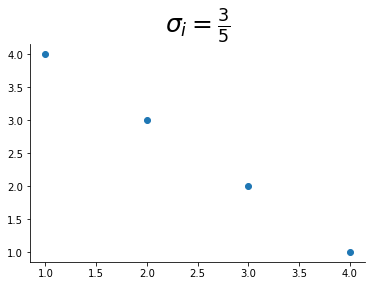

In [97]:
fig, ax = plt.subplots()
ax.scatter([1, 2, 3, 4], [4, 3, 2, 1])
ax.spines['top'].set(visible=False)  # Removing spines so they don't intersect with the title. tight_layout() is not sufficient here.
ax.spines['right'].set(visible=False)
ax.set_title(r'$\sigma_i=\frac{3}{5}$', fontsize=25)
plt.show()

# Limits, Legends and Layouts

In this section, we'll focus on what happens around the edges of the axes:  Ticks, ticklabels, limits, layouts, and legends.

## Legends

As you've seen in some of the examples so far, the X and Y axis can also be labeled, as well as the subplot itself via the title. 

However, another thing you can label is the line/point/bar/etc that you plot.  You can provide a label to your plot, which allows your legend to automatically build itself. 

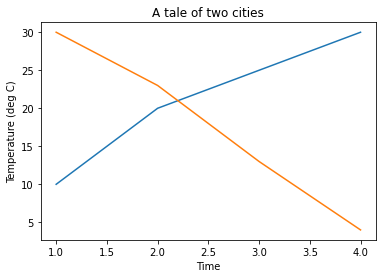

In [98]:
fig, ax = plt.subplots()
ax.plot([1, 2, 3, 4], [10, 20, 25, 30])  # Philadelphia
ax.plot([1, 2, 3, 4], [30, 23, 13, 4])  # Boston
ax.set(ylabel='Temperature (deg C)', xlabel='Time', title='A tale of two cities')
plt.show()

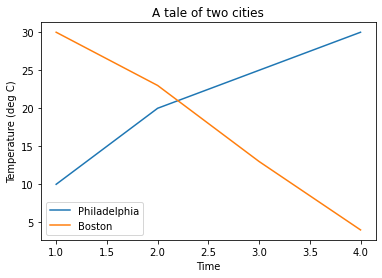

In [99]:
fig, ax = plt.subplots()
ax.plot([1, 2, 3, 4], [10, 20, 25, 30], label='Philadelphia')
ax.plot([1, 2, 3, 4], [30, 23, 13, 4], label='Boston')
ax.set(ylabel='Temperature (deg C)', xlabel='Time', title='A tale of two cities')
ax.legend()
plt.show()

The keyword argument `loc` allows to position the legend at different positions. The `'best'` argument is the default one which automatically chooses the location which overlaps the plot elements as little as possbile.

| Location String | Location Code |
| --- | --- |
| best | 0 |
| upper right | 1 |
| upper left | 2 |
| lower left | 3 |
| lower right | 4 |
| right | 5 |
| center left | 6 |
| center right | 7 |
| lower center | 8 |
| upper center | 9 |
| center | 10 |

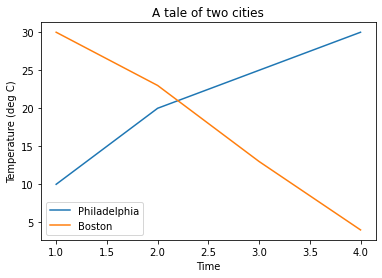

In [100]:
fig, ax = plt.subplots()
ax.plot([1, 2, 3, 4], [10, 20, 25, 30], label='Philadelphia')
ax.plot([1, 2, 3, 4], [30, 23, 13, 4], label='Boston')
ax.set(ylabel='Temperature (deg C)', xlabel='Time', title='A tale of two cities')
ax.legend()
plt.show()

## Ticks, Tick Lines, Tick Labels and Tickers
This is a constant source of confusion:

* A Tick is the *location* of a Tick Label.
* A Tick Line is the line that denotes the location of the tick.
* A Tick Label is the text that is displayed at that tick.
* A [`Ticker`](http://matplotlib.org/api/ticker_api.html#module-matplotlib.ticker) automatically determines the ticks for an Axis and formats the tick labels.

[`tick_params()`](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.tick_params) is often used to help configure your tickers.

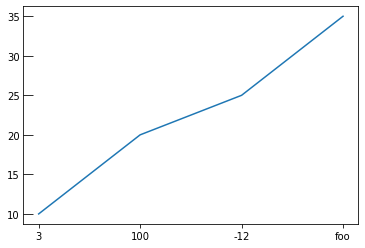

In [101]:
fig, ax = plt.subplots()
ax.plot([1, 2, 3, 4], [10, 20, 25, 35])

# Manually set ticks and tick labels *on the x-axis* (note ax.xaxis.set, not ax.set!)
ax.xaxis.set(ticks=range(1, 5), ticklabels=[3, 100, -12, "foo"]) 

# Make the y-tick lines a bit longer and go in...
ax.tick_params(axis='y', direction='in', length=10)

plt.show()

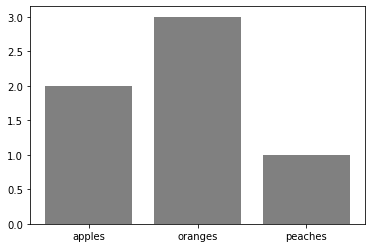

In [102]:
data = [('apples', 2), ('oranges', 3), ('peaches', 1)]
fruit, value = zip(*data)

fig, ax = plt.subplots()
x = np.arange(len(fruit))
ax.bar(x, value, align='center', color='gray')
ax.set(xticks=x, xticklabels=fruit)
plt.show()

## Subplot Spacing
The spacing between the subplots can be adjusted using [`fig.subplots_adjust()`](http://matplotlib.org/api/pyplot_api.html?#matplotlib.pyplot.subplots_adjust). Play around with the example below to see how the different arguments affect the spacing.

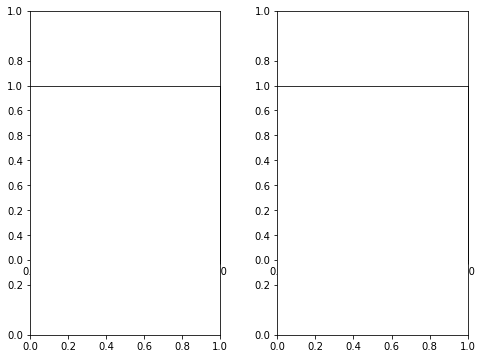

In [103]:
fig, axes = plt.subplots(2, 2, figsize=(9, 9))
fig.subplots_adjust(wspace=0.3, hspace=-0.7,
                   left=0.125, right=0.8,
                   top=0.7,    bottom=0.2)
plt.show()

A common "gotcha" is that the labels are not automatically adjusted to avoid overlapping those of another subplot. Matplotlib does not currently have any sort of robust layout engine, as it is a design decision to minimize the amount of "magical plotting". We intend to let users have complete, 100% control over their plots. LaTeX users would be quite familiar with the amount of frustration that can occur with automatic placement of figures in their documents.

That said, there have been some efforts to develop tools that users can use to help address the most common compaints. The "[Tight Layout](http://matplotlib.org/users/tight_layout_guide.html)" feature, when invoked, will attempt to resize margins and subplots so that nothing overlaps.

If you have multiple subplots, and want to avoid overlapping titles/axis labels/etc, `fig.tight_layout` is a great way to do so:

In [104]:
def example_plot(ax):
    ax.plot([1, 2])
    ax.set_xlabel('x-label', fontsize=16)
    ax.set_ylabel('y-label', fontsize=8)
    ax.set_title('Title', fontsize=24)

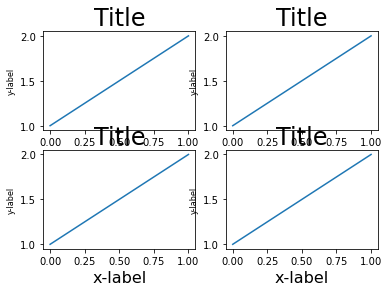

In [105]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
example_plot(ax1)
example_plot(ax2)
example_plot(ax3)
example_plot(ax4)

plt.show()

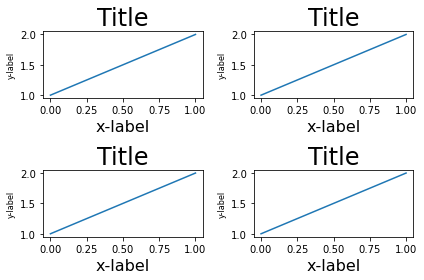

In [106]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
example_plot(ax1)
example_plot(ax2)
example_plot(ax3)
example_plot(ax4)

# Tight layout enabled.
fig.tight_layout()

plt.show()

# mplot3d
By taking advantage of Matplotlib's z-order layering engine, mplot3d emulates 3D plotting by projecting 3D data into 2D space, layer by layer. While it isn't going to replace any of the true 3D plotting libraries anytime soon, its goal is to allow for Matplotlib users to produce 3D plots with the same amount of simplicity as 2D plots. If you want to learn about it [here](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html) is a tutorial.

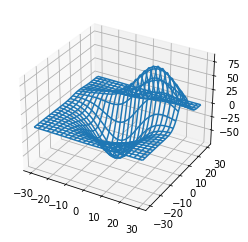

In [107]:
from mpl_toolkits.mplot3d import Axes3D, axes3d

fig, ax = plt.subplots(1, 1, subplot_kw={'projection': '3d'})
X, Y, Z = axes3d.get_test_data(0.05)
ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5)

plt.show()

# Further Readings
Matplotlib chapter from Jake VanderPlas's "Python Data Science Handbook" https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html

[Matplotlib tutorial from Scipy 2018](https://youtu.be/6gdNUDs6QPc)

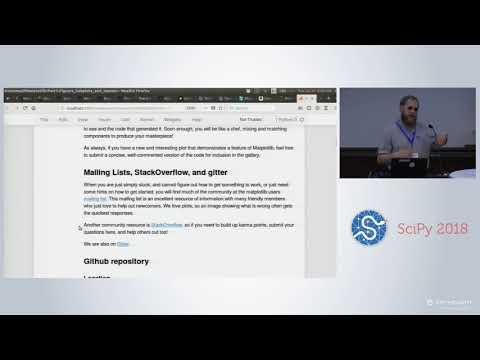

In [108]:
from IPython.display import YouTubeVideo
YouTubeVideo("6gdNUDs6QPc")